<a href="https://colab.research.google.com/github/olfabre/DataMaining_Master_2/blob/main/TP2_1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2_1 - Panorama des méthodes de fouille de données - Analyse exploratoire

Charger le fichier pokemon.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon.csv


On ouvre le fichier pokemon.csv à l’aide de la bibliothèque pandas.

In [ ]:
import pandas as pd

# 1. Chargement du jeu de données
df = pd.read_csv('pokemon.csv')

# 2. Nombre d’attributs (colonnes)
nb_attributs = df.shape[1]
print("Nombre d’attributs :", nb_attributs)

# 3. Types de chaque attribut
types_attributs = df.dtypes
print("\nTypes des attributs :")
print(types_attributs)

# 4. Nombre total de Pokémons recensés
nb_pokemons_total = df.shape[0]
print("\nNombre total de Pokémons :", nb_pokemons_total)

# 5. Conservation uniquement de la 1re génération
df_gen1 = df[df['generation'] == 1].copy()
nb_gen1 = df_gen1.shape[0]
print("\nNombre de Pokémons de 1re génération :", nb_gen1)

# 6. Suppression des colonnes non désirées
colonnes_a_garder = ['name', 'type1'] + \
                    [col for col in df_gen1.columns
                     if df_gen1[col].dtype in ['int64', 'float64'] and col != 'generation']

df_final = df_gen1[colonnes_a_garder]

# Aperçu du résultat
print("\nAperçu du DataFrame final :")
df_final.head()

Nombre d’attributs : 41

Types des attributs :
abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         in

,name,type1,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,Bulbasaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,0.7,45,88.1,1,65,65,45,6.9,0
1,Ivysaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,1.0,60,88.1,2,80,80,60,13.0,0
2,Venusaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,2.0,80,88.1,3,122,120,80,100.0,0
3,Charmander,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,1059860,0.6,39,88.1,4,60,50,65,8.5,0
4,Charmeleon,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,1059860,1.1,58,88.1,5,80,65,80,19.0,0


Création d'un fichier csv ne comportant que les pokemons de première génration

In [ ]:
"""
pokemons_first.py
Crée pokemons_first.csv :
- uniquement les Pokémons de 1ʳᵉ génération
- sans la colonne « generation »
- sans les colonnes non-numériques, sauf « name » et « type1 »
Affiche le nombre d'instances restantes.
"""

import pandas as pd

# --------- paramètres ----------
FICHIER_ENTREE  = "pokemon.csv"      # ou "pokemons.csv"
FICHIER_SORTIE  = "pokemons_first.csv"
# -------------------------------

def main():
    # 1. Chargement
    df = pd.read_csv(FICHIER_ENTREE)

    # 2. Filtre 1ʳᵉ génération
    df = df[df["generation"] == 1].copy()

    # 3. Colonnes à conserver
    cols_a_garder = ["name", "type1"] + \
                    [c for c in df.columns
                     if pd.api.types.is_numeric_dtype(df[c]) and c != "generation"]

    df_final = df[cols_a_garder]

    # 4. Export
    df_final.to_csv(FICHIER_SORTIE, index=False)

    # 5. Affichage du nombre d'instances
    print(f"Nombre de Pokémons de 1ʳᵉ génération : {len(df_final)}")
    print(f"Fichier créé : {FICHIER_SORTIE}")

if __name__ == "__main__":
    main()

Nombre de Pokémons de 1ʳᵉ génération : 151
Fichier créé : pokemons_first.csv


Y a-t-il beaucoup de valeurs manquantes ?

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('pokemons_first.csv')

manquantes = df.isna().sum().sort_values(ascending=False)
print(manquantes[manquantes > 0])

weight_kg          18
height_m           18
percentage_male    13
dtype: int64


Remplacer les valeurs manquantes par la valeur calculée par la stratégie = mdédian



In [ ]:
# impute_median.py
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. chargement
file = "pokemons_first.csv"
df = pd.read_csv(file)

print("Valeurs manquantes AVANT :", df.isna().sum().sum())

# 2. colonnes numériques
cols_num = df.select_dtypes(include=['float64', 'int64']).columns

# 3. imputation par la médiane
imputer = SimpleImputer(strategy='median')
df[cols_num] = imputer.fit_transform(df[cols_num])

print("Valeurs manquantes APRÈS :", df.isna().sum().sum())

# 4. sauvegarde (même fichier)
df.to_csv(file, index=False)
print(f"Fichier '{file}' mis à jour avec les médianes.")

Valeurs manquantes AVANT : 49
Valeurs manquantes APRÈS : 0
Fichier 'pokemons_first.csv' mis à jour avec les médianes.


On va essayer de regarder rapidement les écarts entre les données

In [ ]:
df.describe().loc[['mean','std']]

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary
mean,0.905629,1.066225,0.980132,1.158940,0.917219,0.953642,1.036424,1.168874,0.966887,1.147351,...,1.052281e+06,1.224503,64.344371,55.466887,76.000000,69.403974,67.741722,70.152318,43.941060,0.033113
std,0.572088,0.349645,0.237212,0.693712,0.380484,0.560062,0.620750,0.573403,0.508818,0.970941,...,1.018366e+05,0.944032,28.593483,20.557275,43.734045,33.455080,25.974722,29.170018,54.713617,0.179526


Uploader le fichier depuis mon PC pokemons_first.csv

In [5]:
from google.colab import files
uploaded = files.upload()  # choisis le fichier .csv
import pandas as pd, io
name = next(iter(uploaded))          # récupère le nom envoyé
df = pd.read_csv(io.BytesIO(uploaded[name]))
df.head()

Saving pokemons_first.csv to pokemons_first.csv


,name,type1,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,Bulbasaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,0.7,45,88.1,1,65,65,45,6.9,0
1,Ivysaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,1.0,60,88.1,2,80,80,60,13.0,0
2,Venusaur,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1059860,2.0,80,88.1,3,122,120,80,100.0,0
3,Charmander,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,1059860,0.6,39,88.1,4,60,50,65,8.5,0
4,Charmeleon,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,1059860,1.1,58,88.1,5,80,65,80,19.0,0


ACP avec scikit-learn

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
df = pd.read_csv("pokemons_first.csv")

# Sélection des colonnes numériques
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
X = df[cols_num]

# Imputation et standardisation
X_imputed = SimpleImputer(strategy='median').fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)

# ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# DataFrame pour les graphiques
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df['name'] = df['name'].values
pca_df['type1'] = df['type1'].values

visulisation Plan factoriel (PC1 × PC2)

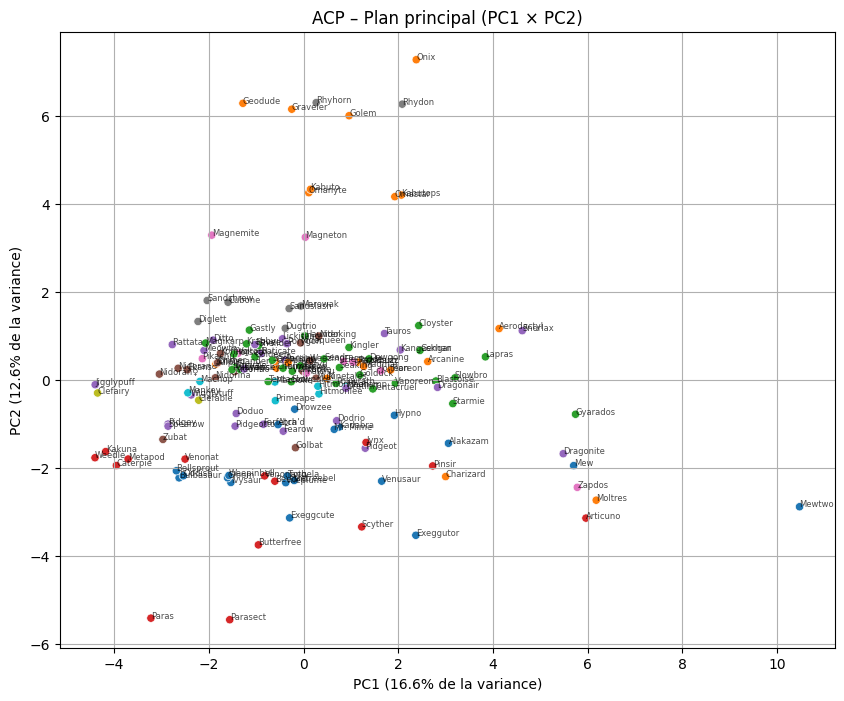

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='type1', palette='tab10', legend=False)
for i, txt in enumerate(pca_df['name']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=6, alpha=0.7)
plt.title("ACP – Plan principal (PC1 × PC2)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} de la variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} de la variance)")
plt.grid(True)
plt.show()

visulisation Plan factoriel (PC3 × PC4)

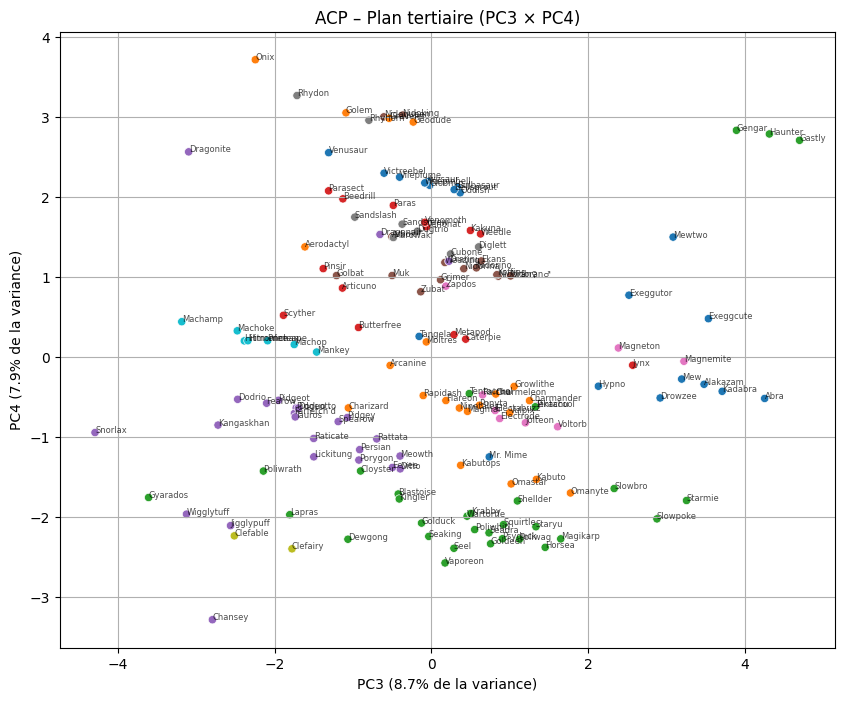

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC3', y='PC4', hue='type1', palette='tab10', legend=False)
for i, txt in enumerate(pca_df['name']):
    plt.annotate(txt, (pca_df['PC3'][i], pca_df['PC4'][i]), fontsize=6, alpha=0.7)
plt.title("ACP – Plan tertiaire (PC3 × PC4)")
plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]:.1%} de la variance)")
plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]:.1%} de la variance)")
plt.grid(True)
plt.show()

Variation des valeurs propres

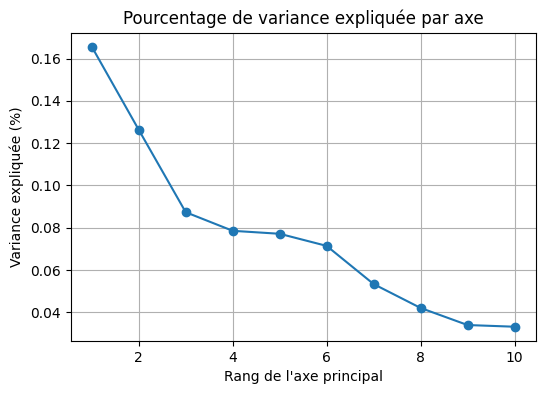

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Après PCA()
variance = pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), variance[:10], 'o-')
plt.title("Pourcentage de variance expliquée par axe")
plt.xlabel("Rang de l'axe principal")
plt.ylabel("Variance expliquée (%)")
plt.grid(True)
plt.show()

Cercle de corrélation – (PC1 × PC2) et (PC3 × PC4)

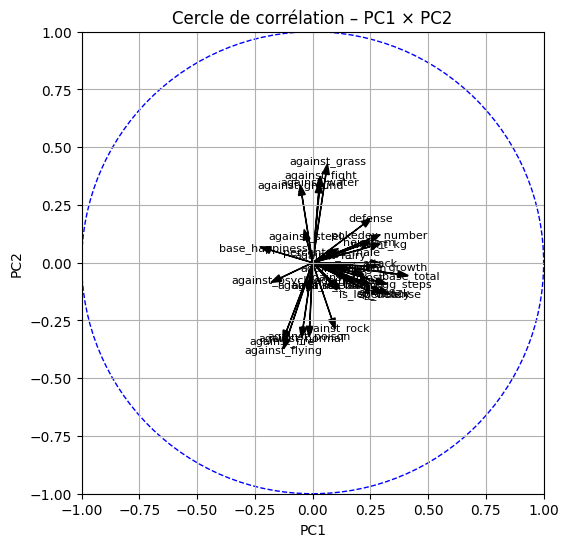

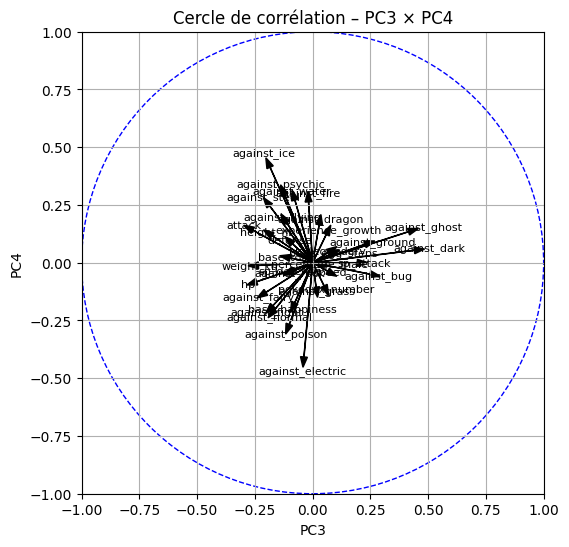

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_circle(pca, axis=(0, 1), figsize=(6, 6)):
    plt.figure(figsize=figsize)
    ax = plt.gca()
    for i, (pcx, pcy) in enumerate(zip(pca.components_[axis[0]], pca.components_[axis[1]])):
        plt.arrow(0, 0, pcx, pcy, head_width=0.03, fc='k')
        plt.text(pcx * 1.15, pcy * 1.15, X.columns[i], fontsize=8, ha='center', va='center')
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', ls='--')
    ax.add_patch(circle)
    plt.xlim(-1, 1); plt.ylim(-1, 1)
    plt.xlabel(f"PC{axis[0]+1}")
    plt.ylabel(f"PC{axis[1]+1}")
    plt.title(f"Cercle de corrélation – PC{axis[0]+1} × PC{axis[1]+1}")
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Graphiques
plot_correlation_circle(pca, (0, 1))
plot_correlation_circle(pca, (2, 3))

KMeans de la bibiothèqe scikit-learn, une répétition de 10 fois par $$k$$  -> moyenne du $$R^2$$  et de la pureté

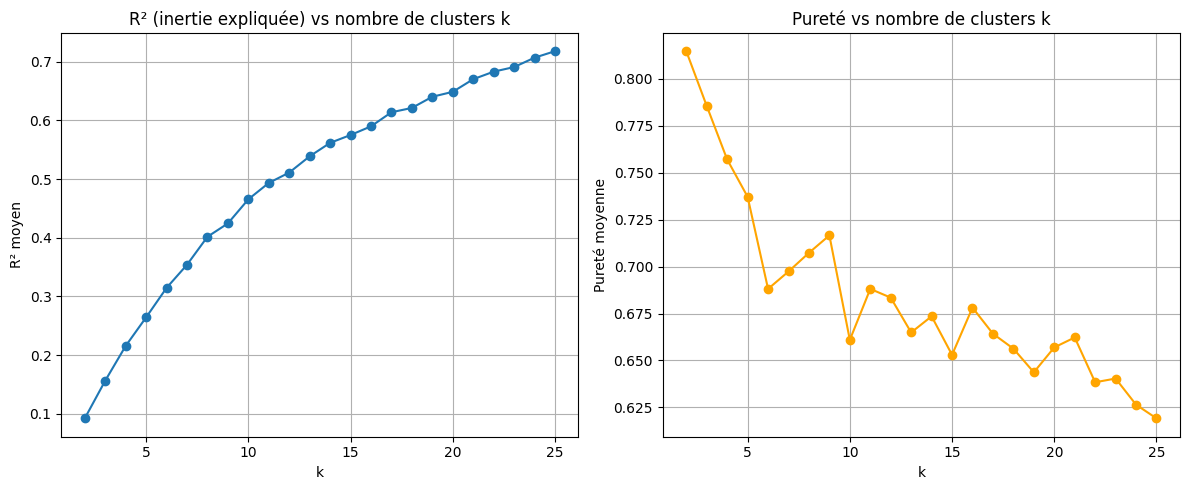

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Chargement
df = pd.read_csv("pokemons_first.csv")

# 2. Sélection numérique
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
X = df[cols_num]

# 3. Imputation + standardisation
X_imputed = SimpleImputer(strategy='median').fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)

# 4. Encodage de type1 pour la pureté
y_true = LabelEncoder().fit_transform(df['type1'])

# 5. Boucle sur k
k_range = range(2, 26)
r2_scores = []
purity_scores = []

for k in k_range:
    r2_list = []
    purity_list = []
    for _ in range(10):  # 10 initialisations aléatoires
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=None)
        labels = kmeans.fit_predict(X_scaled)

        # R² (coefficient de détermination)
        r2 = r2_score(X_scaled, kmeans.cluster_centers_[labels])
        r2_list.append(r2)

        # Pureté
        purity = sum([max(np.bincount(labels[y_true == t])) for t in np.unique(y_true)]) / len(y_true)
        purity_list.append(purity)

    r2_scores.append(np.mean(r2_list))
    purity_scores.append(np.mean(purity_list))

# 6. Graphiques
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, r2_scores, marker='o')
plt.title("R² (inertie expliquée) vs nombre de clusters k")
plt.xlabel("k")
plt.ylabel("R² moyen")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, purity_scores, marker='o', color='orange')
plt.title("Pureté vs nombre de clusters k")
plt.xlabel("k")
plt.ylabel("Pureté moyenne")
plt.grid(True)

plt.tight_layout()
plt.show()

les valeurs réelles

In [12]:
# Après la boucle sur k
results = pd.DataFrame({
    'k': k_range,
    'R2_moyen': r2_scores,
    'Purete_moyenne': purity_scores
})
print(results)

     k  R2_moyen  Purete_moyenne
0    2  0.092240        0.814570
1    3  0.156437        0.785430
2    4  0.215642        0.756954
3    5  0.264360        0.737086
4    6  0.314593        0.688079
5    7  0.353985        0.697351
6    8  0.401671        0.707285
7    9  0.424427        0.716556
8   10  0.465498        0.660927
9   11  0.493415        0.688079
10  12  0.511068        0.683444
11  13  0.538767        0.664901
12  14  0.561690        0.673510
13  15  0.575059        0.652980
14  16  0.589844        0.678146
15  17  0.613844        0.664238
16  18  0.621207        0.656291
17  19  0.640263        0.643709
18  20  0.648644        0.656954
19  21  0.670184        0.662252
20  22  0.683001        0.638411
21  23  0.690862        0.640397
22  24  0.706838        0.626490
23  25  0.717891        0.619205
